In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, average_precision_score, precision_recall_curve
from sklearn.metrics import accuracy_score, classification_report
import warnings 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:\\Dataset\\IMDBdata.csv',header=None)
df.columns = ['Review','Sentiment']

In [3]:
df.shape

(50000, 2)

In [4]:
df

,Review,Sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
sentiment_map = {'positive': 1, 'negative': 0}

# Apply the mapping to the 'Sentiment' column
df['Sentiment'] = df['Sentiment'].map(sentiment_map)

In [6]:
df

,Review,Sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [7]:
from preprocess import preprocess_text

In [8]:
df['Review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [9]:
df['Review'] = df['Review'].apply(preprocess_text)

In [10]:
df['Review'][0]

'one reviewer mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison b

In [11]:
df.isnull().sum()

Review       0
Sentiment    0
dtype: int64

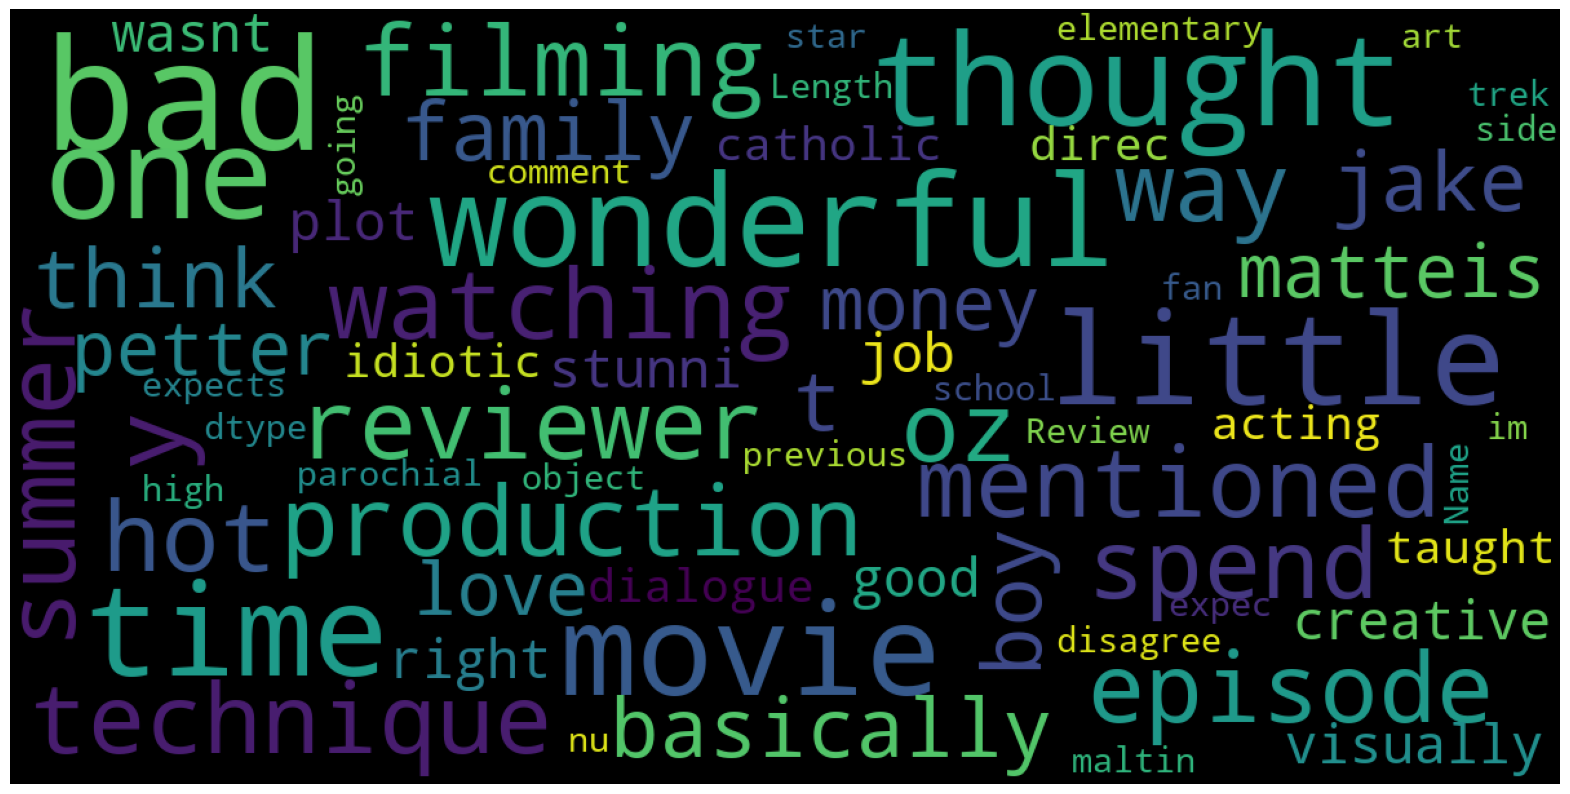

In [12]:
from wordcloud import WordCloud
#  WordCloud chart 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 350,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(df["Review"])

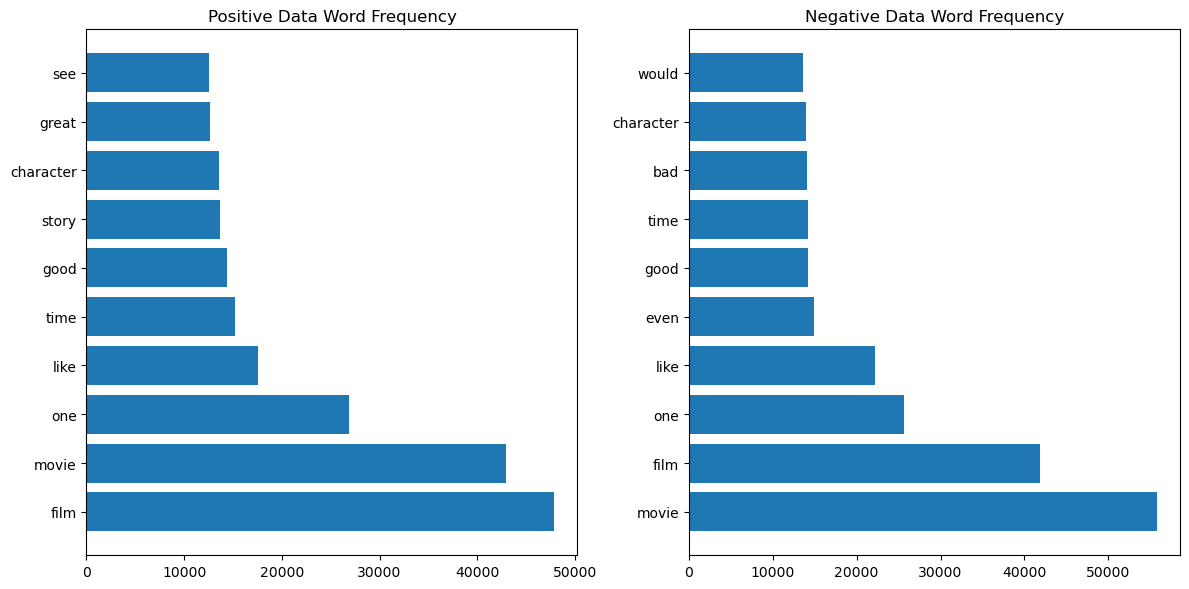

In [13]:
positivedata = df[df['Sentiment'] == 1]
positivedata = positivedata['Review']
negdata = df[df['Sentiment'] == 0]
negdata = negdata['Review']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

In [79]:
Tf = TfidfVectorizer(max_features = 35000, ngram_range=(1,6), analyzer ='char')

In [80]:
X = Tf.fit_transform(df['Review'])
y = df['Sentiment']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 200) 

In [82]:
X_train

<40000x35000 sparse matrix of type '<class 'numpy.float64'>'
	with 80725972 stored elements in Compressed Sparse Row format>

In [83]:
y_train

19347    1
42652    1
21934    1
22897    0
33985    0
        ..
41804    1
46775    0
784      0
12905    1
1818     0
Name: Sentiment, Length: 40000, dtype: int64

D:\Anaconda\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy of SVM Model: 88.96%


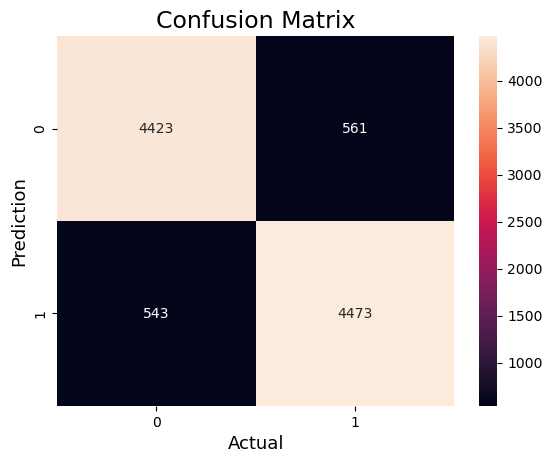

[[4423  561]
 [ 543 4473]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4984
           1       0.89      0.89      0.89      5016

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [84]:
svm = LinearSVC()

svm.fit(X_train, y_train)

# Predict the ratings for the test set
svm_preds = svm.predict(X_test)

# Evaluate the accuracy of the model
svm_accuracy = accuracy_score(y_test, svm_preds)*100
print(f"Accuracy of SVM Model: {svm_accuracy:.2f}%")

#creating the confusion matrix
cm = confusion_matrix(y_test,svm_preds)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
print(cm)
print(classification_report(y_test, svm_preds))

In [85]:
import pickle
pickle.dump(svm,open('svm.pkl','wb'))
pickle.dump(Tf,open('tfidf.pkl','wb'))

In [95]:
from termcolor import colored
def check(text):
    
    process_txt = preprocess_text(text)
    vec = Tf.transform([process_txt])

    # Make prediction
    prediction = svm.predict(vec)[0]

    # Interpret prediction
    if prediction == 1:
        print(colored("Review is Positive", "blue"))
    else:
        print(colored("Review is Negative", "red"))


In [96]:
sent = "This is only a one time watch movie"
check(sent)

Review is Positive


In [97]:
sent = "Any other movie is better than this"
check(sent)

Review is Negative


In [98]:
sent = "Even sleeping is a better option than watching this"
check(sent)

Review is Negative


In [99]:
sent = "This is pure piece of thrash"
check(sent)

Review is Negative


In [100]:
sent = "It is like a roller coster ride. The drama is the only bad thing. Rest of it is perfection"
check(sent)

Review is Positive


In [101]:
sent = "Nothing is good here. Cant understand why this movie is created"
check(sent)

Review is Negative
